#### This is an exact copy of road_classification.py script

In [2]:
# %%
import sys
sys.path.append("..")
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils import plot_history, data_extractor
from helper import road_classification_model


PROJECT_NAME = "road_classification"
DATA_PATH = os.path.join(f"../datasets/{PROJECT_NAME}/Images")
BATCH_SIZE = 32
IMG_SHAPE = (224,224,3)

# Extract the file
data_extractor(PROJECT_NAME)

# Load the data
metadata = pd.read_csv(os.path.join(DATA_PATH, os.pardir, "metadata.csv"))
metadata = metadata.assign(
    images = lambda x: x["filename"].map(
        lambda y: cv2.resize(cv2.imread(os.path.join(DATA_PATH, "Images", y)), (224,224)),
    )
)

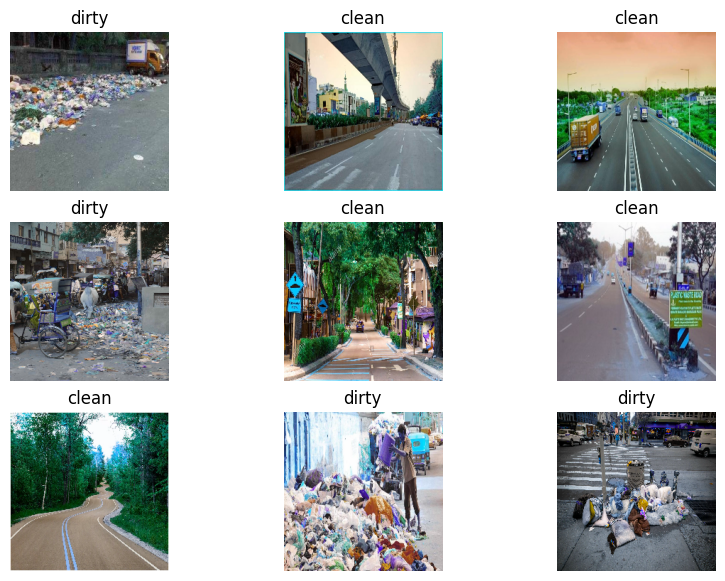

In [3]:
# Plot some images
class_names = ["clean", "dirty"]
plt.figure(figsize=(10,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(metadata["images"][i])
    plt.axis("off")
    plt.title(class_names[metadata["label"][i]])
plt.show()

In [4]:
# Create the training and validation datasets
train, valid = train_test_split(metadata, test_size=0.1, random_state=47)

train_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(train["images"].tolist()), train["label"])
).shuffle(1000).batch(BATCH_SIZE)

valid_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(valid["images"].tolist()), valid["label"])
).shuffle(1000).batch(BATCH_SIZE)

2023-05-11 13:55:01.169519: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-11 13:55:01.176825: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-11 13:55:01.177172: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-11 13:55:01.177795: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [5]:
# Data augmentation
data_augm = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomBrightness(0.1),
    tf.keras.layers.RandomZoom(0.1,0.1)
])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


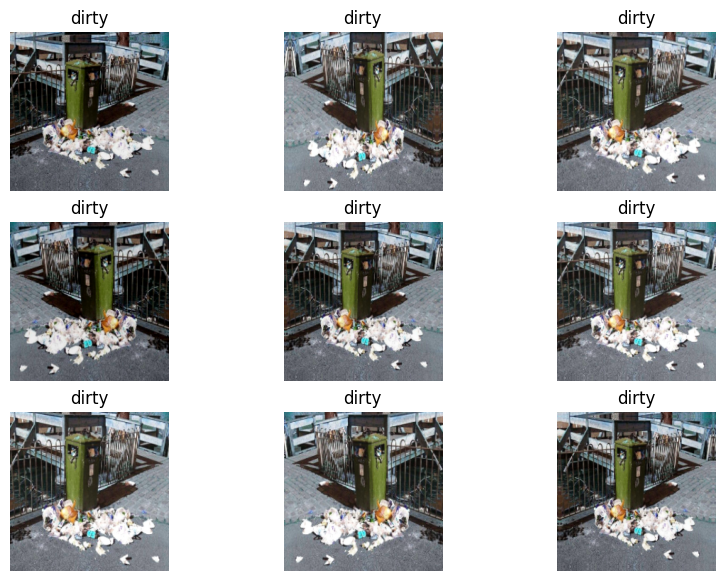

In [6]:
# Plot an augmented image
plt.figure(figsize=(10,7))
for img, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(data_augm(img[1]).numpy().astype("uint8"))
        plt.title(class_names[labels[1].numpy()])
        plt.axis("off")
        plt.show

# Create a new augmented dataset 
train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32), y))
train_ds2 = train_ds.map(lambda x, y: (data_augm(x), y))
train_ds3 = train_ds.map(lambda x, y: (data_augm(x), y))
train_ds4 = train_ds.map(lambda x, y: (data_augm(x), y))
merged_ds = (train_ds
             .concatenate(train_ds2)
             .concatenate(train_ds3)
             .concatenate(train_ds4))

In [7]:
base_mobilenet = tf.keras.applications.mobilenet_v2.MobileNetV2(
    weights="imagenet", include_top=False, input_shape=IMG_SHAPE
    )

Epoch 1/40


2023-05-11 13:55:28.190663: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-05-11 13:55:28.532656: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-11 13:55:29.378637: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f1782ad6160 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-11 13:55:29.378658: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2023-05-11 13:55:29.382428: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-11 13:55:29.436524: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-11 13:55:29.473499: I tensorflow/compiler/jit/xla_com

7/7 [==============================] - 6s 260ms/step - loss: 1.1993 - binary_accuracy: 0.6197 - val_loss: 10.6309 - val_binary_accuracy: 0.5417
Epoch 2/40
7/7 [==============================] - 0s 41ms/step - loss: 0.5825 - binary_accuracy: 0.7042 - val_loss: 0.4357 - val_binary_accuracy: 0.9583
Epoch 3/40
7/7 [==============================] - 0s 41ms/step - loss: 0.3451 - binary_accuracy: 0.9061 - val_loss: 0.4477 - val_binary_accuracy: 0.9583
Epoch 4/40
7/7 [==============================] - 0s 40ms/step - loss: 0.1755 - binary_accuracy: 0.9343 - val_loss: 0.4178 - val_binary_accuracy: 0.9583
Epoch 5/40
7/7 [==============================] - 0s 39ms/step - loss: 0.1036 - binary_accuracy: 0.9718 - val_loss: 0.6982 - val_binary_accuracy: 0.9583
Epoch 6/40
7/7 [==============================] - 0s 40ms/step - loss: 0.0337 - binary_accuracy: 0.9859 - val_loss: 0.6282 - val_binary_accuracy: 0.9583
Epoch 7/40
7/7 [==============================] - 0s 40ms/step - loss: 0.0127 - binary_accu

<Figure size 1400x1000 with 0 Axes>

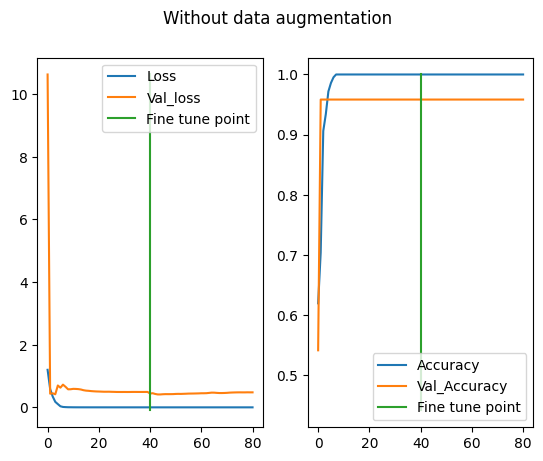

In [8]:
# Without data augmentation

base_mobilenet.trainable = False
model =  road_classification_model(IMG_SHAPE, base_mobilenet)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=tf.keras.metrics.BinaryAccuracy()
)
initial_epochs = 40
history_initial = model.fit(train_ds, epochs=initial_epochs, validation_data=valid_ds)

# Fine tuning, freeze 70% of the baseline model 
fine_tune_epochs = 40

for l in model.layers[3].layers[int(0.7*len(model.layers[3].layers)):]:
    l.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=tf.keras.metrics.BinaryAccuracy())

history_fine = model.fit(train_ds,
                        epochs = initial_epochs + fine_tune_epochs,
                        initial_epoch=history_initial.epoch[-1],
                        validation_data=valid_ds)

# Plots
acc = history_initial.history["binary_accuracy"] + history_fine.history["binary_accuracy"]
loss = history_initial.history["loss"] + history_fine.history["loss"]
val_acc = history_initial.history["val_binary_accuracy"] + history_fine.history["val_binary_accuracy"]
val_loss = history_initial.history["val_loss"] + history_fine.history["val_loss"]

plot_history((loss, val_loss, acc, val_acc), initial_epochs, "Without data augmentation")

Epoch 1/40
7/7 [==============================] - 6s 210ms/step - loss: 1.6521 - binary_accuracy: 0.4930 - val_loss: 10.5979 - val_binary_accuracy: 0.4583
Epoch 2/40
7/7 [==============================] - 1s 122ms/step - loss: 0.8994 - binary_accuracy: 0.4460 - val_loss: 0.6886 - val_binary_accuracy: 0.4583
Epoch 3/40
7/7 [==============================] - 1s 123ms/step - loss: 0.7999 - binary_accuracy: 0.4601 - val_loss: 1.1071 - val_binary_accuracy: 0.5417
Epoch 4/40
7/7 [==============================] - 1s 120ms/step - loss: 0.7647 - binary_accuracy: 0.5305 - val_loss: 1.0252 - val_binary_accuracy: 0.5417
Epoch 5/40
7/7 [==============================] - 1s 119ms/step - loss: 0.7558 - binary_accuracy: 0.4601 - val_loss: 0.7277 - val_binary_accuracy: 0.4583
Epoch 6/40
7/7 [==============================] - 1s 117ms/step - loss: 0.7544 - binary_accuracy: 0.4507 - val_loss: 0.7936 - val_binary_accuracy: 0.5417
Epoch 7/40
7/7 [==============================] - 1s 122ms/step - loss: 0.7

<Figure size 1400x1000 with 0 Axes>

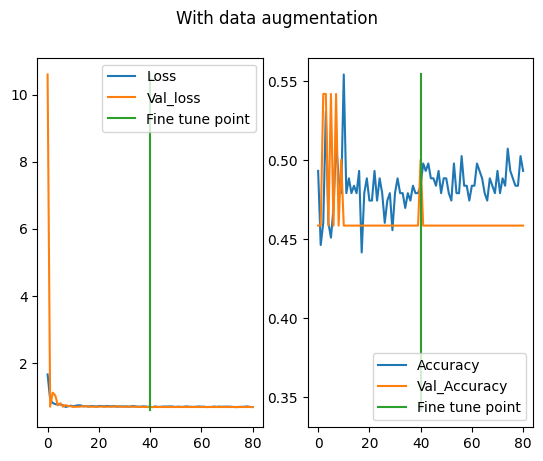

In [9]:
# With data augmentation
model_augm = road_classification_model(IMG_SHAPE, base_mobilenet, augmentation=data_augm)
model_augm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                   loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                   metrics=tf.keras.metrics.BinaryAccuracy())

initial_epochs = 40
fine_tune_epochs = 40
history_initial_augm = model_augm.fit(train_ds, epochs=initial_epochs, validation_data=valid_ds)

for l in model_augm.layers[3].layers[int(0.7*len(model_augm.layers[3].layers)):]:
    l.trainable = True

model_augm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=tf.keras.metrics.BinaryAccuracy())

history_fine_augm = model_augm.fit(train_ds,
                        epochs = initial_epochs + fine_tune_epochs,
                        initial_epoch=history_initial_augm.epoch[-1],
                        validation_data=valid_ds)

# Plots
acc = history_initial_augm.history["binary_accuracy"] + history_fine_augm.history["binary_accuracy"]
loss = history_initial_augm.history["loss"] + history_fine_augm.history["loss"]
val_acc = history_initial_augm.history["val_binary_accuracy"] + history_fine_augm.history["val_binary_accuracy"]
val_loss = history_initial_augm.history["val_loss"] + history_fine_augm.history["val_loss"]

plot_history((loss, val_loss, acc, val_acc), initial_epochs, "With data augmentation")

Epoch 1/40
28/28 [==============================] - 6s 127ms/step - loss: 0.7253 - binary_accuracy: 0.7500 - val_loss: 0.8599 - val_binary_accuracy: 0.9167
Epoch 2/40
28/28 [==============================] - 3s 105ms/step - loss: 0.0602 - binary_accuracy: 0.9777 - val_loss: 0.6130 - val_binary_accuracy: 0.9583
Epoch 3/40
28/28 [==============================] - 3s 104ms/step - loss: 0.0047 - binary_accuracy: 0.9988 - val_loss: 0.5297 - val_binary_accuracy: 0.9583
Epoch 4/40
28/28 [==============================] - 3s 105ms/step - loss: 0.0018 - binary_accuracy: 1.0000 - val_loss: 0.4882 - val_binary_accuracy: 0.9583
Epoch 5/40
28/28 [==============================] - 3s 104ms/step - loss: 5.6732e-04 - binary_accuracy: 1.0000 - val_loss: 0.4278 - val_binary_accuracy: 0.9583
Epoch 6/40
28/28 [==============================] - 3s 103ms/step - loss: 3.1886e-04 - binary_accuracy: 1.0000 - val_loss: 0.4772 - val_binary_accuracy: 0.9583
Epoch 7/40
28/28 [==============================] - 3s 1

<Figure size 1400x1000 with 0 Axes>

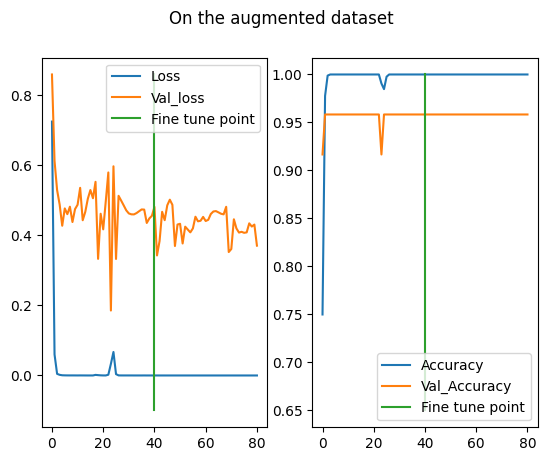

In [10]:
# Augmented dataset
base_mobilenet.trainable = False
model_merged =  road_classification_model(IMG_SHAPE, base_mobilenet)

model_merged.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=tf.keras.metrics.BinaryAccuracy()
)
initial_epochs = 40
fine_tune_epochs = 40
history_initial_merged = model_merged.fit(merged_ds, epochs=initial_epochs, validation_data=valid_ds)

# Fine tuning, freeze 70% of the baseline model_merged 

for l in model_merged.layers[3].layers[int(0.7*len(model_merged.layers[3].layers)):]:
    l.trainable = True

model_merged.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=tf.keras.metrics.BinaryAccuracy())

history_fine_merged = model_merged.fit(merged_ds,
                        epochs = initial_epochs + fine_tune_epochs,
                        initial_epoch=history_initial_merged.epoch[-1],
                        validation_data=valid_ds)

# Plots
acc = history_initial_merged.history["binary_accuracy"] + history_fine_merged.history["binary_accuracy"]
loss = history_initial_merged.history["loss"] + history_fine_merged.history["loss"]
val_acc = history_initial_merged.history["val_binary_accuracy"] + history_fine_merged.history["val_binary_accuracy"]
val_loss = history_initial_merged.history["val_loss"] + history_fine_merged.history["val_loss"]

plot_history((loss, val_loss, acc, val_acc), initial_epochs, "On the augmented dataset")

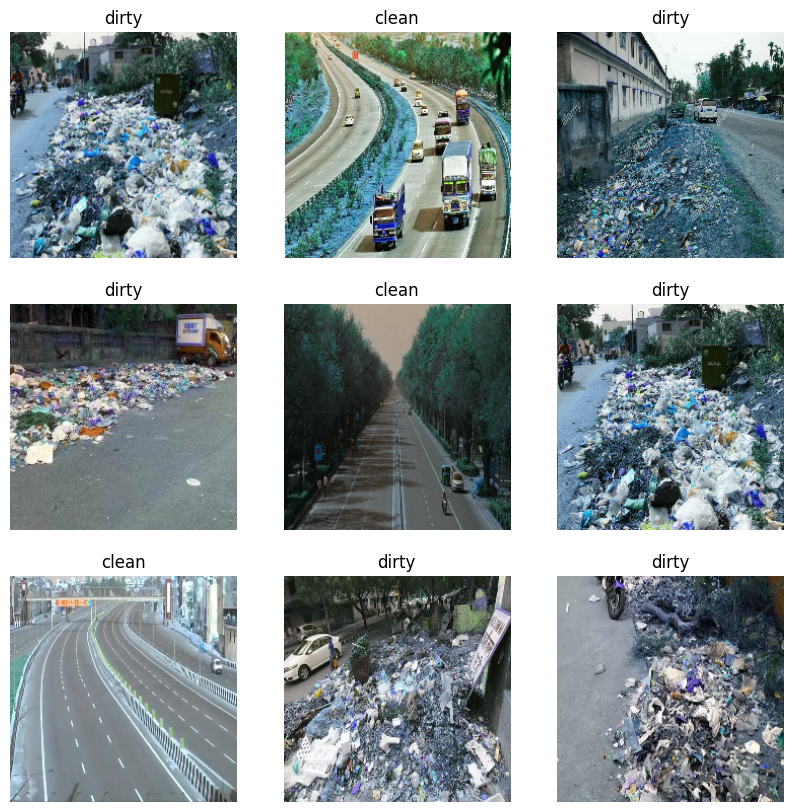

In [11]:
# Predictions on the Validation set
# Retrieve a batch of images from the test set
image_batch, label_batch = valid_ds.as_numpy_iterator().next()
predictions = model_merged.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")